# Customer Attrition Prediction - Classification problem

We need to predict whether a particular customer will continue his telecommunication services based on certain features<br><br>The training dataset contains 6338 samples and the testset contains 705 samples. Each sample contains 15 features and 1 prediction variable "CustomerAttrition" which indicates the class of the sample. The 15 input features and 1 prediction variable are:<br><br>
"ID", string, the Customer ID allocated to each customer,<br>
"sex", string, the gender of the person,<br>
"Aged", Boolean, tells if the person is old,<br>
"Married", Boolean, The marrital status of the person,<br>
"TotalDependents", Boolean, Tells whether the person is dependent or independent,<br>
"ServiceSpan", numerical, gives the timespan of the service taken by the person,<br>
"4GService",string, the intenet service taken by the person ,<br>
"CyberProtection", Boolean, tells if cyber protection plan of company is taken by the person or not<br>
"HardwareSupport", Boolean, tells if hardware support plan of company is taken by the person or not,<br>
"TechnicalAssistance", Boolean, tells if technical assistance of company is taken by the person or not,<br>
"FilmSubscription", Boolean, tells whether the person has subscribed for films,<br>
"SettlementProcess", string, The payment process chosen by the person,<br>
"QuarterlyPayment", numerical, The quaterly payment made by the person,<br>
"GrandPayment", numerical, The cummalative payment made by the person,<br>
"CustomerAttrition", Boolean, The choice of continuation of services taken by the customer,<br>

Your task is to predict the <b>customer Attrition for each customer </b>in the given dataset using data science models.


<b>Importing Packages</b>

In [298]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


import seaborn as sns




<b>Reading CSV files</b>

In [299]:
df_train=pd.read_csv('kdag_train.csv')
df_train


,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes
6334,NGY3WOQ0OT1P4RHAR0PT,Female,Yes,No,No,-1,Yes,Satellite Broadband,No,No,No,Yes,Bank,44.782165,45.308180,No
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,No,No,No,No,No,Electronic,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,No,No,No,No,Yes,Card,94.762984,4563.812326,No


In [300]:
df_train['ServiceSpan'].unique()

array([48, 45, 59, 14, 25, 27, 53,  0,  1, 46, 67, 24, 61, 54,  9, 30, 18,
        5, 64,  3, 41, 40, 31, 21, 15,  6, 69, 72, 33, 71,  2, 36,  8, 37,
       34, 28, -1, 60, 22, 68, 11, 39, 58, 10, 50,  4, 44, 49, 38, 55, 51,
       16, 65, 13, 26, 19, 57, 70, 73, 42, 35, 62, 23, 56, 47, 63, 32, 29,
        7, 20, 43, 12, 52, 17, 66, -2], dtype=int64)

<b>Since ServiceSpan contains some negative values which is not possible , hence preprocessed them by taking absolute values</b>

In [301]:
df_train['ServiceSpan'] = abs(df_train['ServiceSpan'])

In [302]:
df_train


,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes
6334,NGY3WOQ0OT1P4RHAR0PT,Female,Yes,No,No,1,Yes,Satellite Broadband,No,No,No,Yes,Bank,44.782165,45.308180,No
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,No,No,No,No,No,Electronic,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,No,No,No,No,Yes,Card,94.762984,4563.812326,No


In [303]:
df_test=pd.read_csv('kdag_test.csv')
df_test

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,Male,No,No,No,8,Yes,Wifi Broadband,No,No,No,Yes,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,Female,No,No,No,26,Yes,Satellite Broadband,No,Yes,No,Yes,Check,56.609623,1553.276979
2,IDCQS0CO5P29AMKY3LO1,Male,No,No,No,66,Yes,Satellite Broadband,No,No,No,Yes,Card,25.167690,1684.262416
3,1IY29SDITYU6IFZ4KJB0,Female,Yes,No,No,31,Yes,Satellite Broadband,No,No,Yes,Yes,Bank,55.560968,1829.874462
4,T5XMW5B0YPCONH30WJD2,Female,No,Yes,Yes,21,Yes,Satellite Broadband,No,No,No,No,Bank,20.070002,489.818170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,Female,No,Yes,No,67,Yes,Satellite Broadband,No,Yes,Yes,No,Card,109.033026,7345.910050
701,WS1T1FLY87G9A1UNKST4,Male,No,No,No,2,Yes,Wifi Broadband,No,No,No,No,Card,71.468072,130.565363
702,0XG96FS1KXZSULPSGA1X,Female,No,Yes,No,22,Yes,Wifi Broadband,No,Yes,No,Yes,Electronic,102.930468,2392.842382
703,YR858QHNQMCDBCT9JRP6,Female,No,No,No,4,Yes,Wifi Broadband,No,No,No,No,Electronic,51.862869,263.231362


In [304]:
df_test['ServiceSpan']=abs(df_test['ServiceSpan'])

<b>Checking for null values and if found , fill them with the mean of the column</b>

In [305]:
bool_series = pd.isnull(df_train['GrandPayment'])  
    
#54th row of delivery type contains nan

print(df_train[bool_series])

df_train=df_train.fillna(df_train.mean())

                        ID     sex Aged Married TotalDependents  ServiceSpan  \
643   WM9BC6CU0ZI1B7WDPZ6G  Female   No     Yes             Yes            1   
1169  41E4MSKS139ATWAHUWS5    Male   No     Yes             Yes            1   
1186  LZMNTZPKWEM8IAOSPSTQ  Female   No     Yes             Yes            1   
2281  N3OCBW4F5ADT1GNDI1K8  Female   No     Yes             Yes            1   
3611  IS6FHA32W1KEETF478HC    Male   No     Yes             Yes            1   
3918  S661RZU0I205HLT4G6DD    Male   No     Yes             Yes            0   
5579  Z5G1GX5IS15OMT9HRYJU    Male   No     Yes             Yes            0   
5742  QEQYQ949C4H8J47LT3W4  Female   No     Yes             Yes            2   
5796  P7UZJPSJDE0QKU1L3MIP    Male   No     Yes             Yes            1   
6203  SGAKX7STDIYEMP82AMFY    Male   No      No             Yes            1   

     MobileService            4GService CyberProtection HardwareSupport  \
643            Yes                   No     

In [306]:
bool_series = pd.isnull(df_test['ServiceSpan'])  
    
#54th row of delivery type contains nan

df_test[bool_series]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment


In [307]:
df_test=df_test.fillna(df_test.mean())

In [308]:
bool_series = pd.isnull(df_train['GrandPayment'])  
    
#54th row of delivery type contains nan

df_train[bool_series]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition


In [309]:
df_train['4GService'].value_counts()

Wifi Broadband         2794
Satellite Broadband    2177
No                     1367
Name: 4GService, dtype: int64

<b>Mapping the 4Gservice values as Whether 4g service like wifi or satellite broadband is taken or not</b>

In [310]:
df_train['4GService'] = df_train['4GService'].map({'Wifi Broadband':1 ,'Satellite Broadband':1,'No':0})
df_test['4GService'] = df_test['4GService'].map({'Wifi Broadband':1 ,'Satellite Broadband':1,'No':0})
df_train['SettlementProcess'] = df_train['SettlementProcess'].map({'Check':0,'Bank':0,'Card':0,'Electronic':1})
df_test['SettlementProcess'] = df_test['SettlementProcess'].map({'Check':0,'Bank':0,'Card':0,'Electronic':1})

In [311]:
df_train

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,1,No,Yes,Yes,No,0,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,1,No,No,No,Yes,0,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,1,Yes,No,Yes,No,0,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,1,No,No,No,No,0,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,1,No,Yes,No,Yes,0,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,1,No,Yes,No,Yes,0,100.391595,441.914530,Yes
6334,NGY3WOQ0OT1P4RHAR0PT,Female,Yes,No,No,1,Yes,1,No,No,No,Yes,0,44.782165,45.308180,No
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,0,No,No,No,No,1,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,0,No,No,No,Yes,0,94.762984,4563.812326,No


In [312]:
df_train['4GService'].value_counts()

1    4971
0    1367
Name: 4GService, dtype: int64

In [313]:
#so ID basically is different for each row so it plays the same role as the index so we can delete that column

ans=df_test['ID']
del df_train['ID']
del df_test['ID']

<b>Checking for duplicate rows</b>

In [314]:
dups = df_train.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_train[dups])

False
Empty DataFrame
Columns: [sex, Aged, Married, TotalDependents, ServiceSpan, MobileService, 4GService, CyberProtection, HardwareSupport, TechnicalAssistance, FilmSubscription, SettlementProcess, QuarterlyPayment, GrandPayment, CustomerAttrition]
Index: []


In [315]:
dups1 = df_test.duplicated()
# report if there are any duplicates
print(dups1.any())
# list all duplicate rows
print(df_test[dups1])

False
Empty DataFrame
Columns: [sex, Aged, Married, TotalDependents, ServiceSpan, MobileService, 4GService, CyberProtection, HardwareSupport, TechnicalAssistance, FilmSubscription, SettlementProcess, QuarterlyPayment, GrandPayment]
Index: []


In [316]:
df_train.nunique()

sex                       2
Aged                      2
Married                   2
TotalDependents           2
ServiceSpan              74
MobileService             2
4GService                 2
CyberProtection           2
HardwareSupport           2
TechnicalAssistance       2
FilmSubscription          2
SettlementProcess         2
QuarterlyPayment       6338
GrandPayment           6329
CustomerAttrition         2
dtype: int64

In [317]:
df_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,Female,No,No,Yes,48,Yes,1,No,Yes,Yes,No,0,96.259802,4628.129119,Yes
1,Male,No,Yes,No,45,Yes,1,No,No,No,Yes,0,18.876470,922.085998,No
2,Male,Yes,Yes,No,59,Yes,1,Yes,No,Yes,No,0,106.016057,6205.891129,Yes
3,Male,No,No,No,14,Yes,1,No,No,No,No,0,80.108839,1248.655391,No
4,Female,No,Yes,Yes,25,Yes,1,No,Yes,No,Yes,0,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Female,Yes,No,No,3,Yes,1,No,Yes,No,Yes,0,100.391595,441.914530,Yes
6334,Female,Yes,No,No,1,Yes,1,No,No,No,Yes,0,44.782165,45.308180,No
6335,Male,No,No,Yes,18,Yes,0,No,No,No,No,1,35.941713,552.181341,Yes
6336,Male,No,Yes,No,46,Yes,0,No,No,No,Yes,0,94.762984,4563.812326,No


<b>Using label encoder for categorical features </b>

In [318]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df_train['sex']=scaler.fit_transform(df_train['sex'])   #female=0,male=1
df_train['Aged']=scaler.fit_transform(df_train['Aged'])
df_train['Married']=scaler.fit_transform(df_train['Married'])
df_train['TotalDependents']=scaler.fit_transform(df_train['TotalDependents'])
df_train['MobileService']=scaler.fit_transform(df_train['MobileService'])
df_train['4GService']=scaler.fit_transform(df_train['4GService'])
df_train['CyberProtection']=scaler.fit_transform(df_train['CyberProtection'])
df_train['HardwareSupport']=scaler.fit_transform(df_train['HardwareSupport'])
df_train['TechnicalAssistance']=scaler.fit_transform(df_train['TechnicalAssistance'])
df_train['FilmSubscription']=scaler.fit_transform(df_train['FilmSubscription'])
print(df_train['SettlementProcess'].unique())
df_train['SettlementProcess']=scaler.fit_transform(df_train['SettlementProcess']) #bank=0;card=1;check=2
print(df_train['SettlementProcess'].unique())
df_train['CustomerAttrition']=scaler.fit_transform(df_train['CustomerAttrition'])


[0 1]
[0 1]


In [319]:
# from sklearn.preprocessing import LabelEncoder
# scaler=LabelEncoder()
df_test['sex']=scaler.fit_transform(df_test['sex'])   #female=0,male=1
df_test['Aged']=scaler.fit_transform(df_test['Aged'])
df_test['Married']=scaler.fit_transform(df_test['Married'])
df_test['TotalDependents']=scaler.fit_transform(df_test['TotalDependents'])
df_test['MobileService']=scaler.fit_transform(df_test['MobileService'])
df_test['4GService']=scaler.fit_transform(df_test['4GService'])
df_test['CyberProtection']=scaler.fit_transform(df_test['CyberProtection'])
df_test['HardwareSupport']=scaler.fit_transform(df_test['HardwareSupport'])
df_test['TechnicalAssistance']=scaler.fit_transform(df_test['TechnicalAssistance'])
df_test['FilmSubscription']=scaler.fit_transform(df_test['FilmSubscription'])
print(df_test['SettlementProcess'].unique())
df_test['SettlementProcess']=scaler.fit_transform(df_test['SettlementProcess'])  #back=0;card=1;check=2
print(df_test['SettlementProcess'].unique())



[0 1]
[0 1]


In [320]:
df_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,0,0,0,1,48,1,1,0,1,1,0,0,96.259802,4628.129119,1
1,1,0,1,0,45,1,1,0,0,0,1,0,18.876470,922.085998,0
2,1,1,1,0,59,1,1,1,0,1,0,0,106.016057,6205.891129,1
3,1,0,0,0,14,1,1,0,0,0,0,0,80.108839,1248.655391,0
4,0,0,1,1,25,1,1,0,1,0,1,0,51.529773,1285.321277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,3,1,1,0,1,0,1,0,100.391595,441.914530,1
6334,0,1,0,0,1,1,1,0,0,0,1,0,44.782165,45.308180,0
6335,1,0,0,1,18,1,0,0,0,0,0,1,35.941713,552.181341,1
6336,1,0,1,0,46,1,0,0,0,0,1,0,94.762984,4563.812326,0


<b>Performing some EDA</b>

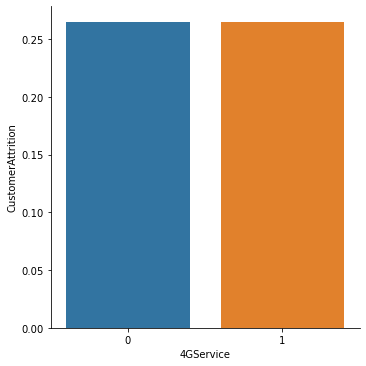

In [321]:

sns.catplot(y='CustomerAttrition', x='4GService', kind='bar', data=df_train,ci=None); 

<b>Checking correlation matrix</b>

In [322]:
df_train.corr()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
sex,1.000000,0.010574,0.011507,0.019798,-0.009100,-0.005611,-0.000008,-0.000490,0.011030,0.024580,0.016960,-0.013900,-0.008915,-0.006878,-0.039800
Aged,0.010574,1.000000,0.018309,-0.210340,0.016048,0.029844,0.017620,-0.042587,0.054611,-0.063357,0.010981,0.173405,0.216218,0.101527,0.144672
Married,0.011507,0.018309,1.000000,0.455287,0.385679,-0.023568,-0.009926,0.141450,0.157880,0.120549,0.004464,-0.090849,0.095550,0.321523,-0.154822
TotalDependents,0.019798,-0.210340,0.455287,1.000000,0.160570,-0.026288,-0.015817,0.081748,0.017826,0.063526,0.009367,-0.153436,-0.109819,0.067500,-0.162315
ServiceSpan,-0.009100,0.016048,0.385679,0.160570,1.000000,-0.034640,-0.002406,0.322731,0.355139,0.319519,0.008504,-0.209725,0.249330,0.823624,-0.347577
MobileService,-0.005611,0.029844,-0.023568,-0.026288,-0.034640,1.000000,-0.005484,0.005401,-0.013705,0.007843,0.012523,0.025254,0.019051,-0.011713,0.030120
4GService,-0.000008,0.017620,-0.009926,-0.015817,-0.002406,-0.005484,1.000000,-0.005333,-0.000514,0.005672,0.003243,0.007523,0.017262,0.008515,0.000302
CyberProtection,-0.000490,-0.042587,0.141450,0.081748,0.322731,0.005401,-0.005333,1.000000,0.275200,0.350807,-0.013337,-0.115047,0.300024,0.410544,-0.168867
HardwareSupport,0.011030,0.054611,0.157880,0.017826,0.355139,-0.013705,-0.000514,0.275200,1.000000,0.332540,-0.003059,-0.003464,0.481190,0.519127,-0.068453
TechnicalAssistance,0.024580,-0.063357,0.120549,0.063526,0.319519,0.007843,0.005672,0.350807,0.332540,1.000000,0.006713,-0.113573,0.337477,0.429187,-0.164134


In [323]:
((df_train['GrandPayment'] / df_train['QuarterlyPayment'])*df_train['ServiceSpan']).corr(df_train['CustomerAttrition'])

-0.31458765371265535

<AxesSubplot:xlabel='GrandPayment'>

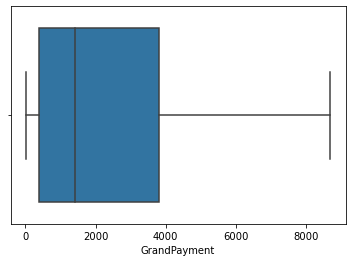

In [324]:
import seaborn as sns
sns.boxplot(x=df_train['GrandPayment'])

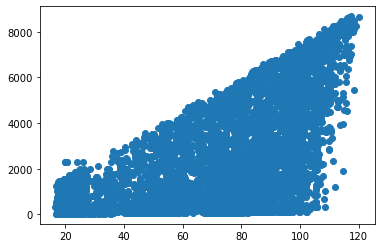

In [325]:
plt.scatter(df_train['QuarterlyPayment'],df_train['GrandPayment'])

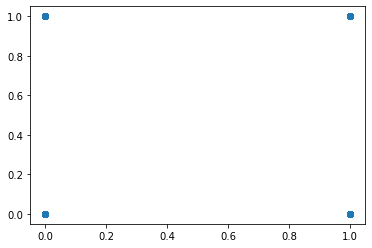

In [326]:
plt.scatter(df_train['sex'],df_train['Aged'])

In [327]:
df_train.corr()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
sex,1.000000,0.010574,0.011507,0.019798,-0.009100,-0.005611,-0.000008,-0.000490,0.011030,0.024580,0.016960,-0.013900,-0.008915,-0.006878,-0.039800
Aged,0.010574,1.000000,0.018309,-0.210340,0.016048,0.029844,0.017620,-0.042587,0.054611,-0.063357,0.010981,0.173405,0.216218,0.101527,0.144672
Married,0.011507,0.018309,1.000000,0.455287,0.385679,-0.023568,-0.009926,0.141450,0.157880,0.120549,0.004464,-0.090849,0.095550,0.321523,-0.154822
TotalDependents,0.019798,-0.210340,0.455287,1.000000,0.160570,-0.026288,-0.015817,0.081748,0.017826,0.063526,0.009367,-0.153436,-0.109819,0.067500,-0.162315
ServiceSpan,-0.009100,0.016048,0.385679,0.160570,1.000000,-0.034640,-0.002406,0.322731,0.355139,0.319519,0.008504,-0.209725,0.249330,0.823624,-0.347577
MobileService,-0.005611,0.029844,-0.023568,-0.026288,-0.034640,1.000000,-0.005484,0.005401,-0.013705,0.007843,0.012523,0.025254,0.019051,-0.011713,0.030120
4GService,-0.000008,0.017620,-0.009926,-0.015817,-0.002406,-0.005484,1.000000,-0.005333,-0.000514,0.005672,0.003243,0.007523,0.017262,0.008515,0.000302
CyberProtection,-0.000490,-0.042587,0.141450,0.081748,0.322731,0.005401,-0.005333,1.000000,0.275200,0.350807,-0.013337,-0.115047,0.300024,0.410544,-0.168867
HardwareSupport,0.011030,0.054611,0.157880,0.017826,0.355139,-0.013705,-0.000514,0.275200,1.000000,0.332540,-0.003059,-0.003464,0.481190,0.519127,-0.068453
TechnicalAssistance,0.024580,-0.063357,0.120549,0.063526,0.319519,0.007843,0.005672,0.350807,0.332540,1.000000,0.006713,-0.113573,0.337477,0.429187,-0.164134


In [328]:
#we see from above table that the maximum correlation between the two features is 0.519 
#between grandpayment and hardware support
#so no two columns are highly correlated

# also correlation between film subscription and customer attrition is too low and hence
# it is not used much for predicting the output

del df_train['FilmSubscription']
del df_test['FilmSubscription']

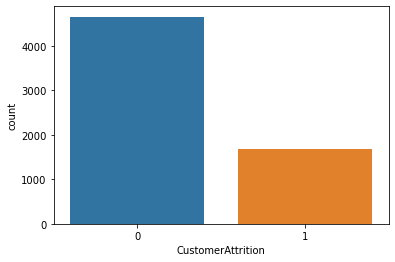

In [329]:
sns.countplot(x='CustomerAttrition', data=df_train);

##most of the people are not likely to continue the service

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


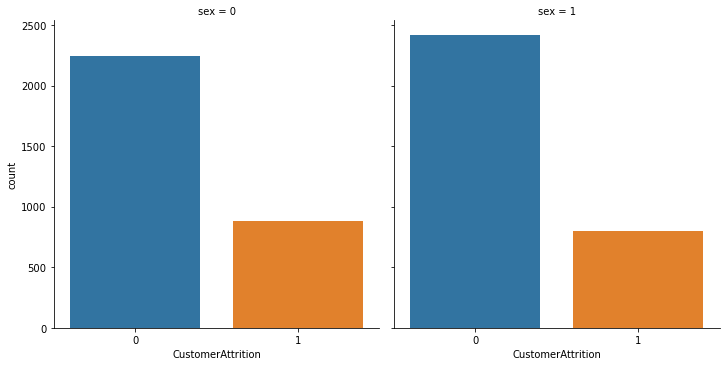

In [330]:
sns.factorplot(x='CustomerAttrition', col='sex', kind='count', data=df_train); 
#we can see most of the men do not want to continue the service

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


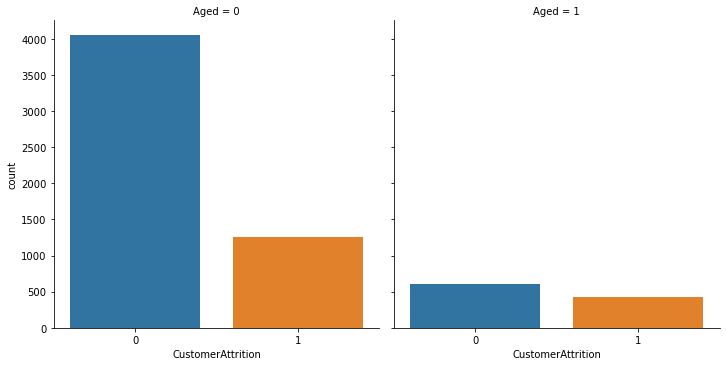

In [332]:
sns.factorplot(x='CustomerAttrition', col='Aged', kind='count', data=df_train); 

In [333]:
df_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,0,0,0,1,48,1,1,0,1,1,0,96.259802,4628.129119,1
1,1,0,1,0,45,1,1,0,0,0,0,18.876470,922.085998,0
2,1,1,1,0,59,1,1,1,0,1,0,106.016057,6205.891129,1
3,1,0,0,0,14,1,1,0,0,0,0,80.108839,1248.655391,0
4,0,0,1,1,25,1,1,0,1,0,0,51.529773,1285.321277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,3,1,1,0,1,0,0,100.391595,441.914530,1
6334,0,1,0,0,1,1,1,0,0,0,0,44.782165,45.308180,0
6335,1,0,0,1,18,1,0,0,0,0,1,35.941713,552.181341,1
6336,1,0,1,0,46,1,0,0,0,0,0,94.762984,4563.812326,0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


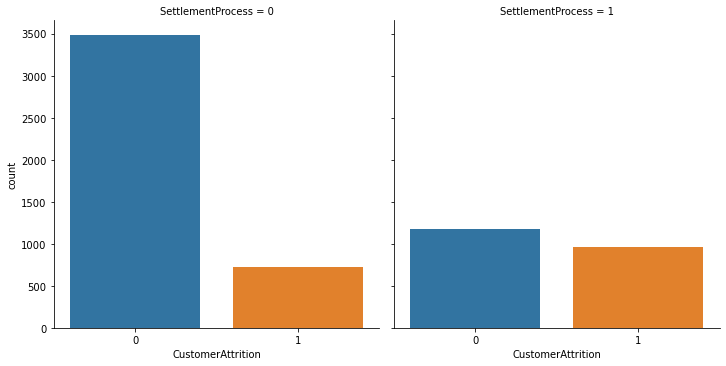

In [334]:
sns.factorplot(x='CustomerAttrition', col='SettlementProcess', kind='count', data=df_train); 

In [336]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_other=MinMaxScaler()
df_train['ServiceSpan']=scaler_other.fit_transform(df_train[['ServiceSpan']])
df_train['QuarterlyPayment']=scaler_other.fit_transform(df_train[['QuarterlyPayment']])
df_train['GrandPayment']=scaler_other.fit_transform(df_train[['GrandPayment']])


In [337]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_other=MinMaxScaler()
df_test['ServiceSpan']=scaler_other.fit_transform(df_test[['ServiceSpan']])
df_test['QuarterlyPayment']=scaler_other.fit_transform(df_test[['QuarterlyPayment']])
df_test['GrandPayment']=scaler_other.fit_transform(df_test[['GrandPayment']])



In [338]:
df_train.corr()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
sex,1.000000,0.010574,0.011507,0.019798,-0.009100,-0.005611,-0.000008,-0.000490,0.011030,0.024580,-0.013900,-0.008915,-0.006878,-0.039800
Aged,0.010574,1.000000,0.018309,-0.210340,0.016048,0.029844,0.017620,-0.042587,0.054611,-0.063357,0.173405,0.216218,0.101527,0.144672
Married,0.011507,0.018309,1.000000,0.455287,0.385679,-0.023568,-0.009926,0.141450,0.157880,0.120549,-0.090849,0.095550,0.321523,-0.154822
TotalDependents,0.019798,-0.210340,0.455287,1.000000,0.160570,-0.026288,-0.015817,0.081748,0.017826,0.063526,-0.153436,-0.109819,0.067500,-0.162315
ServiceSpan,-0.009100,0.016048,0.385679,0.160570,1.000000,-0.034640,-0.002406,0.322731,0.355139,0.319519,-0.209725,0.249330,0.823624,-0.347577
MobileService,-0.005611,0.029844,-0.023568,-0.026288,-0.034640,1.000000,-0.005484,0.005401,-0.013705,0.007843,0.025254,0.019051,-0.011713,0.030120
4GService,-0.000008,0.017620,-0.009926,-0.015817,-0.002406,-0.005484,1.000000,-0.005333,-0.000514,0.005672,0.007523,0.017262,0.008515,0.000302
CyberProtection,-0.000490,-0.042587,0.141450,0.081748,0.322731,0.005401,-0.005333,1.000000,0.275200,0.350807,-0.115047,0.300024,0.410544,-0.168867
HardwareSupport,0.011030,0.054611,0.157880,0.017826,0.355139,-0.013705,-0.000514,0.275200,1.000000,0.332540,-0.003464,0.481190,0.519127,-0.068453
TechnicalAssistance,0.024580,-0.063357,0.120549,0.063526,0.319519,0.007843,0.005672,0.350807,0.332540,1.000000,-0.113573,0.337477,0.429187,-0.164134


In [339]:
y_train=df_train[['CustomerAttrition']]
del df_train['CustomerAttrition']
X_train=df_train

In [340]:
X_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,0,1,0.657534,1,1,0,1,1,0,0.769434,0.531957
1,1,0,1,0,0.616438,1,1,0,0,0,0,0.022887,0.104479
2,1,1,1,0,0.808219,1,1,1,0,1,0,0.863556,0.713946
3,1,0,0,0,0.191781,1,1,0,0,0,0,0.613619,0.142148
4,0,0,1,1,0.342466,1,1,0,1,0,0,0.337906,0.146377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,0.041096,1,1,0,1,0,0,0.809294,0.049093
6334,0,1,0,0,0.013699,1,1,0,0,0,0,0.272809,0.003346
6335,1,0,0,1,0.246575,1,0,0,0,0,1,0.187522,0.061812
6336,1,0,1,0,0.630137,1,0,0,0,0,0,0.754993,0.524539


In [341]:
X_test=df_test

In [342]:
df_test
df_test['SettlementProcess'].unique()

array([0, 1], dtype=int64)

In [343]:
df_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,0,1,0.657534,1,1,0,1,1,0,0.769434,0.531957
1,1,0,1,0,0.616438,1,1,0,0,0,0,0.022887,0.104479
2,1,1,1,0,0.808219,1,1,1,0,1,0,0.863556,0.713946
3,1,0,0,0,0.191781,1,1,0,0,0,0,0.613619,0.142148
4,0,0,1,1,0.342466,1,1,0,1,0,0,0.337906,0.146377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,0.041096,1,1,0,1,0,0,0.809294,0.049093
6334,0,1,0,0,0.013699,1,1,0,0,0,0,0.272809,0.003346
6335,1,0,0,1,0.246575,1,0,0,0,0,1,0.187522,0.061812
6336,1,0,1,0,0.630137,1,0,0,0,0,0,0.754993,0.524539


In [344]:
df_train['QuarterlyPayment'].corr(df_train['GrandPayment'])

0.6519977628241382

In [345]:
X_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,0,1,0.657534,1,1,0,1,1,0,0.769434,0.531957
1,1,0,1,0,0.616438,1,1,0,0,0,0,0.022887,0.104479
2,1,1,1,0,0.808219,1,1,1,0,1,0,0.863556,0.713946
3,1,0,0,0,0.191781,1,1,0,0,0,0,0.613619,0.142148
4,0,0,1,1,0.342466,1,1,0,1,0,0,0.337906,0.146377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,0.041096,1,1,0,1,0,0,0.809294,0.049093
6334,0,1,0,0,0.013699,1,1,0,0,0,0,0.272809,0.003346
6335,1,0,0,1,0.246575,1,0,0,0,0,1,0.187522,0.061812
6336,1,0,1,0,0.630137,1,0,0,0,0,0,0.754993,0.524539


In [346]:
X_train.corr()


,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
sex,1.000000,0.010574,0.011507,0.019798,-0.009100,-0.005611,-0.000008,-0.000490,0.011030,0.024580,-0.013900,-0.008915,-0.006878
Aged,0.010574,1.000000,0.018309,-0.210340,0.016048,0.029844,0.017620,-0.042587,0.054611,-0.063357,0.173405,0.216218,0.101527
Married,0.011507,0.018309,1.000000,0.455287,0.385679,-0.023568,-0.009926,0.141450,0.157880,0.120549,-0.090849,0.095550,0.321523
TotalDependents,0.019798,-0.210340,0.455287,1.000000,0.160570,-0.026288,-0.015817,0.081748,0.017826,0.063526,-0.153436,-0.109819,0.067500
ServiceSpan,-0.009100,0.016048,0.385679,0.160570,1.000000,-0.034640,-0.002406,0.322731,0.355139,0.319519,-0.209725,0.249330,0.823624
MobileService,-0.005611,0.029844,-0.023568,-0.026288,-0.034640,1.000000,-0.005484,0.005401,-0.013705,0.007843,0.025254,0.019051,-0.011713
4GService,-0.000008,0.017620,-0.009926,-0.015817,-0.002406,-0.005484,1.000000,-0.005333,-0.000514,0.005672,0.007523,0.017262,0.008515
CyberProtection,-0.000490,-0.042587,0.141450,0.081748,0.322731,0.005401,-0.005333,1.000000,0.275200,0.350807,-0.115047,0.300024,0.410544
HardwareSupport,0.011030,0.054611,0.157880,0.017826,0.355139,-0.013705,-0.000514,0.275200,1.000000,0.332540,-0.003464,0.481190,0.519127
TechnicalAssistance,0.024580,-0.063357,0.120549,0.063526,0.319519,0.007843,0.005672,0.350807,0.332540,1.000000,-0.113573,0.337477,0.429187


In [347]:

# del X_train['sex']
# del X_test['sex']
# del X_train['4GService']
# del X_test['4GService']



In [348]:
X_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,0,1,0.657534,1,1,0,1,1,0,0.769434,0.531957
1,1,0,1,0,0.616438,1,1,0,0,0,0,0.022887,0.104479
2,1,1,1,0,0.808219,1,1,1,0,1,0,0.863556,0.713946
3,1,0,0,0,0.191781,1,1,0,0,0,0,0.613619,0.142148
4,0,0,1,1,0.342466,1,1,0,1,0,0,0.337906,0.146377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,0.041096,1,1,0,1,0,0,0.809294,0.049093
6334,0,1,0,0,0.013699,1,1,0,0,0,0,0.272809,0.003346
6335,1,0,0,1,0.246575,1,0,0,0,0,1,0.187522,0.061812
6336,1,0,1,0,0.630137,1,0,0,0,0,0,0.754993,0.524539


In [349]:
X_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,0,1,0.657534,1,1,0,1,1,0,0.769434,0.531957
1,1,0,1,0,0.616438,1,1,0,0,0,0,0.022887,0.104479
2,1,1,1,0,0.808219,1,1,1,0,1,0,0.863556,0.713946
3,1,0,0,0,0.191781,1,1,0,0,0,0,0.613619,0.142148
4,0,0,1,1,0.342466,1,1,0,1,0,0,0.337906,0.146377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,0.041096,1,1,0,1,0,0,0.809294,0.049093
6334,0,1,0,0,0.013699,1,1,0,0,0,0,0.272809,0.003346
6335,1,0,0,1,0.246575,1,0,0,0,0,1,0.187522,0.061812
6336,1,0,1,0,0.630137,1,0,0,0,0,0,0.754993,0.524539


In [350]:
X_test

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,1,0,0,0,0.109589,1,1,0,0,0,0,0.049036,0.015608
1,0,0,0,0,0.356164,1,1,0,1,0,0,0.394966,0.180034
2,1,0,0,0,0.904110,1,1,0,0,0,0,0.086928,0.195394
3,0,1,0,0,0.424658,1,1,0,0,1,0,0.384693,0.212469
4,0,0,1,1,0.287671,1,1,0,0,0,0,0.036986,0.055328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,0,1,0,0.917808,1,1,0,1,1,0,0.908562,0.859303
701,1,0,0,0,0.027397,1,1,0,0,0,0,0.540536,0.013201
702,0,0,1,0,0.301370,1,1,0,1,0,1,0.848774,0.278485
703,0,0,0,0,0.054795,1,1,0,0,0,1,0.348462,0.028758


In [351]:
X_test

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,1,0,0,0,0.109589,1,1,0,0,0,0,0.049036,0.015608
1,0,0,0,0,0.356164,1,1,0,1,0,0,0.394966,0.180034
2,1,0,0,0,0.904110,1,1,0,0,0,0,0.086928,0.195394
3,0,1,0,0,0.424658,1,1,0,0,1,0,0.384693,0.212469
4,0,0,1,1,0.287671,1,1,0,0,0,0,0.036986,0.055328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,0,1,0,0.917808,1,1,0,1,1,0,0.908562,0.859303
701,1,0,0,0,0.027397,1,1,0,0,0,0,0.540536,0.013201
702,0,0,1,0,0.301370,1,1,0,1,0,1,0.848774,0.278485
703,0,0,0,0,0.054795,1,1,0,0,0,1,0.348462,0.028758


In [352]:
X_train['x']=y_train['CustomerAttrition']
X_train.corr()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment,x
sex,1.000000,0.010574,0.011507,0.019798,-0.009100,-0.005611,-0.000008,-0.000490,0.011030,0.024580,-0.013900,-0.008915,-0.006878,-0.039800
Aged,0.010574,1.000000,0.018309,-0.210340,0.016048,0.029844,0.017620,-0.042587,0.054611,-0.063357,0.173405,0.216218,0.101527,0.144672
Married,0.011507,0.018309,1.000000,0.455287,0.385679,-0.023568,-0.009926,0.141450,0.157880,0.120549,-0.090849,0.095550,0.321523,-0.154822
TotalDependents,0.019798,-0.210340,0.455287,1.000000,0.160570,-0.026288,-0.015817,0.081748,0.017826,0.063526,-0.153436,-0.109819,0.067500,-0.162315
ServiceSpan,-0.009100,0.016048,0.385679,0.160570,1.000000,-0.034640,-0.002406,0.322731,0.355139,0.319519,-0.209725,0.249330,0.823624,-0.347577
MobileService,-0.005611,0.029844,-0.023568,-0.026288,-0.034640,1.000000,-0.005484,0.005401,-0.013705,0.007843,0.025254,0.019051,-0.011713,0.030120
4GService,-0.000008,0.017620,-0.009926,-0.015817,-0.002406,-0.005484,1.000000,-0.005333,-0.000514,0.005672,0.007523,0.017262,0.008515,0.000302
CyberProtection,-0.000490,-0.042587,0.141450,0.081748,0.322731,0.005401,-0.005333,1.000000,0.275200,0.350807,-0.115047,0.300024,0.410544,-0.168867
HardwareSupport,0.011030,0.054611,0.157880,0.017826,0.355139,-0.013705,-0.000514,0.275200,1.000000,0.332540,-0.003464,0.481190,0.519127,-0.068453
TechnicalAssistance,0.024580,-0.063357,0.120549,0.063526,0.319519,0.007843,0.005672,0.350807,0.332540,1.000000,-0.113573,0.337477,0.429187,-0.164134


In [353]:
del X_train['x']


In [354]:
X_train['QuarterlyPayment']=np.log(X_train['QuarterlyPayment']+1)
X_train['GrandPayment']=np.log(X_train['GrandPayment']+1)

X_test['QuarterlyPayment']=np.log(X_test['QuarterlyPayment']+1)
X_test['GrandPayment']=np.log(X_test['GrandPayment']+1)

In [355]:
X_train

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,0,1,0.657534,1,1,0,1,1,0,0.570659,0.426546
1,1,0,1,0,0.616438,1,1,0,0,0,0,0.022629,0.099374
2,1,1,1,0,0.808219,1,1,1,0,1,0,0.622486,0.538798
3,1,0,0,0,0.191781,1,1,0,0,0,0,0.478479,0.132911
4,0,0,1,1,0.342466,1,1,0,1,0,0,0.291106,0.136607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0,0.041096,1,1,0,1,0,0,0.592937,0.047926
6334,0,1,0,0,0.013699,1,1,0,0,0,0,0.241226,0.003341
6335,1,0,0,1,0.246575,1,0,0,0,0,1,0.171869,0.059977
6336,1,0,1,0,0.630137,1,0,0,0,0,0,0.562465,0.421692


In [356]:
#married columns does'nt help much in predicting the final outcome
del X_train['Married']
del X_test['Married']

In [357]:
X_train

,sex,Aged,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,SettlementProcess,QuarterlyPayment,GrandPayment
0,0,0,1,0.657534,1,1,0,1,1,0,0.570659,0.426546
1,1,0,0,0.616438,1,1,0,0,0,0,0.022629,0.099374
2,1,1,0,0.808219,1,1,1,0,1,0,0.622486,0.538798
3,1,0,0,0.191781,1,1,0,0,0,0,0.478479,0.132911
4,0,0,1,0.342466,1,1,0,1,0,0,0.291106,0.136607
...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,1,0,0.041096,1,1,0,1,0,0,0.592937,0.047926
6334,0,1,0,0.013699,1,1,0,0,0,0,0.241226,0.003341
6335,1,0,1,0.246575,1,0,0,0,0,1,0.171869,0.059977
6336,1,0,0,0.630137,1,0,0,0,0,0,0.562465,0.421692


<b>Training the model using Random forest Classifier</b>

In [360]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier


model=RandomForestClassifier(n_estimators=200,max_features=5,random_state=0,max_depth=8).fit(X_train,np.ravel(y_train))

from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(model,X_train.to_numpy(),np.ravel(y_train),cv=5,scoring='accuracy')
print(np.mean(cv_scores))


0.7966220909822005


In [361]:
model.feature_importances_

array([0.01311232, 0.02425324, 0.01505935, 0.26387919, 0.00693404,
       0.00878799, 0.02835703, 0.01042182, 0.03085633, 0.12955345,
       0.26656278, 0.20222247])

<b>Giving prediction on test set</b>

In [363]:
predictions=model.predict(X_test)

In [364]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [365]:
sub=pd.DataFrame(ans)
sub

,ID
0,WMORTPCG3HTIPEFSGUFY
1,GBLPEA16C3KGBO57KEFO
2,IDCQS0CO5P29AMKY3LO1
3,1IY29SDITYU6IFZ4KJB0
4,T5XMW5B0YPCONH30WJD2
...,...
700,8M7JJ5JBQUIA0ORLJ1UU
701,WS1T1FLY87G9A1UNKST4
702,0XG96FS1KXZSULPSGA1X
703,YR858QHNQMCDBCT9JRP6


In [366]:
sub['CustomerAttrition']=predictions
sub

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,0
1,GBLPEA16C3KGBO57KEFO,0
2,IDCQS0CO5P29AMKY3LO1,0
3,1IY29SDITYU6IFZ4KJB0,0
4,T5XMW5B0YPCONH30WJD2,0
...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,0
701,WS1T1FLY87G9A1UNKST4,1
702,0XG96FS1KXZSULPSGA1X,1
703,YR858QHNQMCDBCT9JRP6,0


In [367]:
sub['CustomerAttrition'] = sub['CustomerAttrition'].map({0:'No' ,1:'Yes'})
sub

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No
...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,No
701,WS1T1FLY87G9A1UNKST4,Yes
702,0XG96FS1KXZSULPSGA1X,Yes
703,YR858QHNQMCDBCT9JRP6,No


In [368]:
sub=sub.set_index('ID')
sub

,CustomerAttrition
ID,
WMORTPCG3HTIPEFSGUFY,No
GBLPEA16C3KGBO57KEFO,No
IDCQS0CO5P29AMKY3LO1,No
1IY29SDITYU6IFZ4KJB0,No
T5XMW5B0YPCONH30WJD2,No
...,...
8M7JJ5JBQUIA0ORLJ1UU,No
WS1T1FLY87G9A1UNKST4,Yes
0XG96FS1KXZSULPSGA1X,Yes


In [369]:
sub['CustomerAttrition'].value_counts()

No     564
Yes    141
Name: CustomerAttrition, dtype: int64

<b>Saving the final prediction on test set in csv file to be submitted on Kaggle<br>
Gave an accuracy of 82.765% on public leaderboard and 80.790% on private leaderboard
<br>final ranking for the competition was 39 - Team ChosenOnes

In [372]:
sub.to_csv('kdag_elastic_new.csv')